In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install tabulate

In [ ]:
#Handling data as arrays
import numpy as np

#Handling data frames
import pandas as pd


#Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

#Stats functions
from scipy import stats
from scipy.interpolate import interpn

from sklearn.impute import SimpleImputer

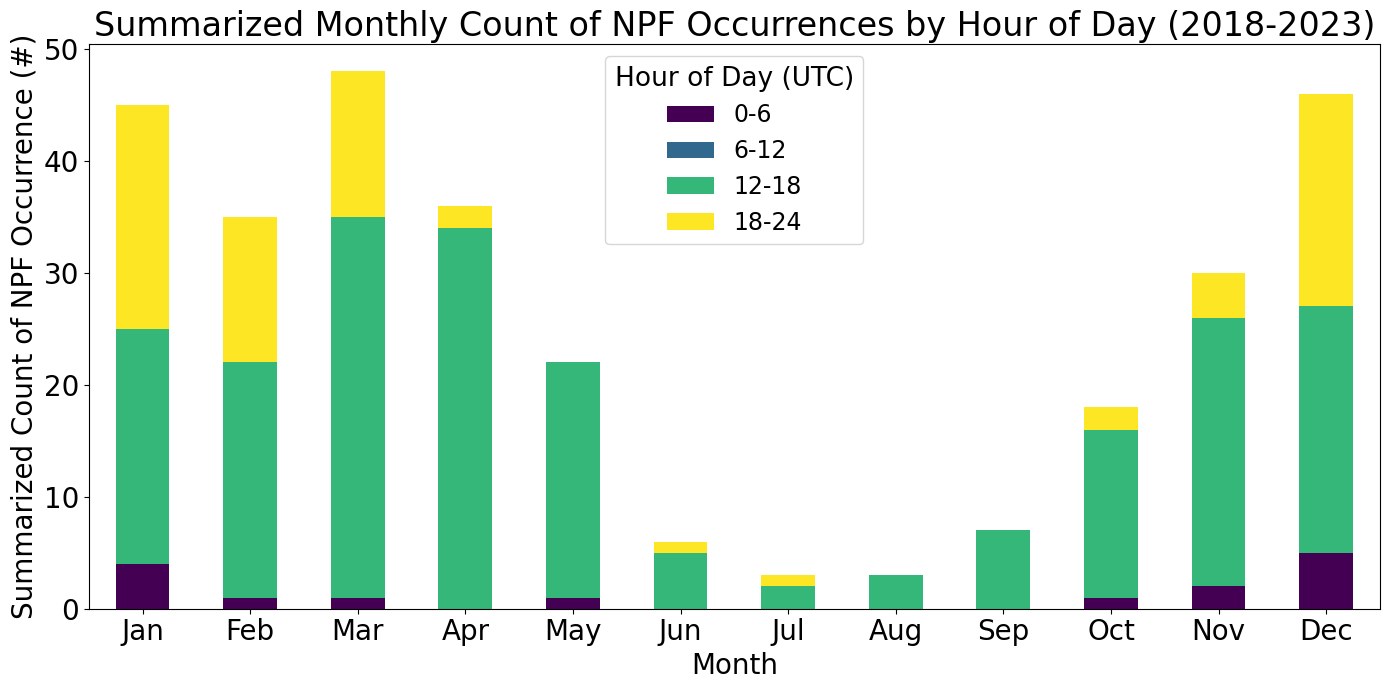

time_group  0-6  6-12  12-18  18-24
month                              
Jan         4.0   NaN   21.0   20.0
Feb         1.0   NaN   21.0   13.0
Mar         1.0   NaN   34.0   13.0
Apr         0.0   NaN   34.0    2.0
May         1.0   NaN   21.0    0.0
Jun         0.0   NaN    5.0    1.0
Jul         0.0   NaN    2.0    1.0
Aug         0.0   NaN    3.0    0.0
Sep         0.0   NaN    7.0    0.0
Oct         1.0   NaN   15.0    2.0
Nov         2.0   NaN   24.0    4.0
Dec         5.0   NaN   22.0   19.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Read the data
Dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all.csv')

# Convert the 'date' column to datetime and extract year and month
Dat['date'] = pd.to_datetime(Dat['date'], format='%Y%m%d')
Dat['year'] = Dat['date'].dt.year
Dat['month'] = Dat['date'].dt.month

# Function to categorize 'start_time'
def time_group(start_time):
    if pd.isna(start_time):  # Check for NaN values
        return 'NaN'
    elif start_time < 6:
        return '0-6'
    elif start_time < 12:
        return '6-12'
    elif start_time < 18:
        return '12-18'
    else:
        return '18-24'

# Apply the function to create a new 'time_group' column
Dat['time_group'] = Dat['start_time'].apply(time_group)

# Group by month and time_group, then sum up the counts across all years
grouped_data = Dat.groupby(['month', 'time_group']).size().reset_index(name='count')

# Pivot the grouped data for plotting
pivot_data = grouped_data.pivot_table(index='month', columns='time_group', values='count', fill_value=0)

# Prepare data for stacked bar chart
pivot_data = pivot_data.reindex(columns=['0-6', '6-12', '12-18', '18-24'])

# Convert index to month names
pivot_data.index = pivot_data.index.map(lambda x: calendar.month_abbr[x])

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

# Set larger fonts for the title, x-axis label, and y-axis label
plt.title('Summarized Monthly Count of NPF Occurrences by Hour of Day (2018-2023)', fontsize=24)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Summarized Count of NPF Occurrence (#)', fontsize=20)

# Set the font size for the tick labels
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)

# Set the font size for the legend
plt.legend(title='Hour of Day (UTC)', fontsize=17, title_fontsize=19)

plt.tight_layout()

# Save the figure
plt.savefig('/content/drive/MyDrive/PNNL_Data/csv_count/Counts of NPF Occurrence.png', format='png', dpi=300)

# Show the plot
plt.show()

# Print the pivot table
print(pivot_data)


<ipython-input-7-10b4db2a2991>:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = Dat.groupby(['quarter', 'time_group']).size().reset_index(name='count')


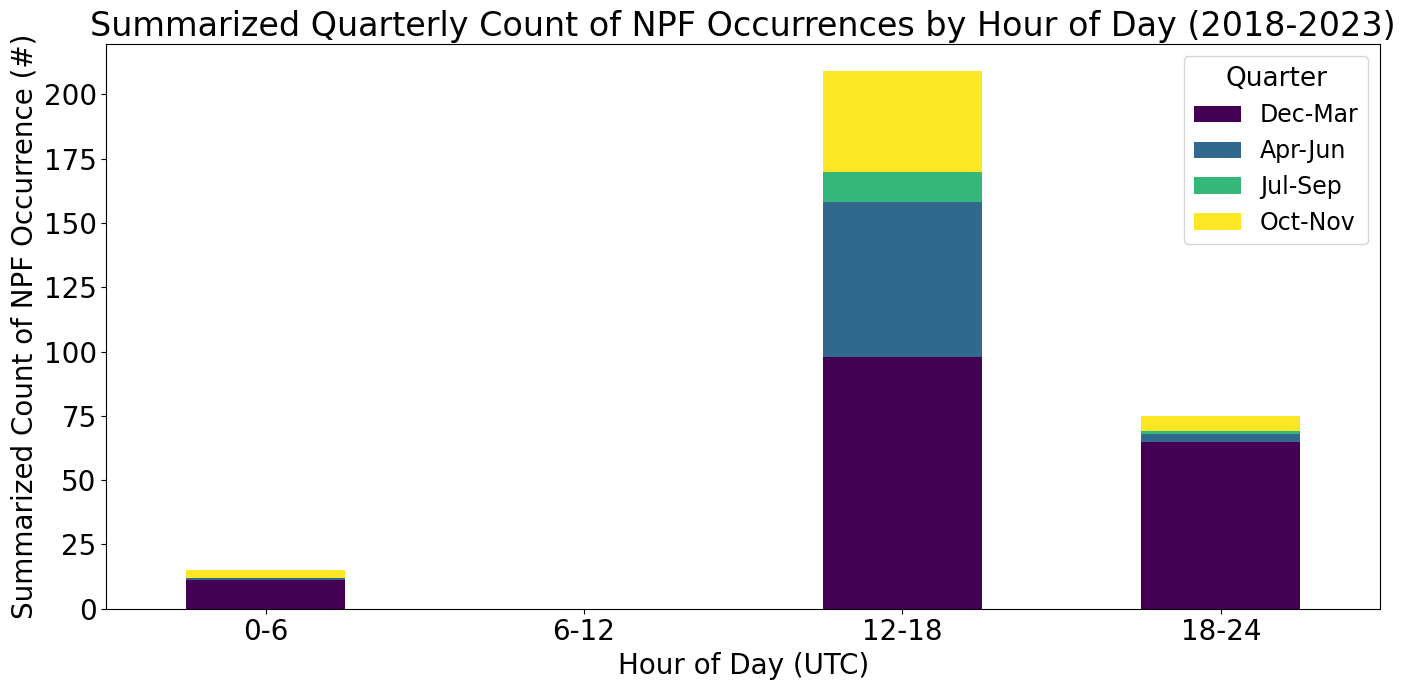

quarter     Dec-Mar  Apr-Jun  Jul-Sep  Oct-Nov
time_group                                    
0-6            11.0      1.0      0.0      3.0
6-12            0.0      0.0      0.0      0.0
12-18          98.0     60.0     12.0     39.0
18-24          65.0      3.0      1.0      6.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
Dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all.csv')

# Convert the 'date' column to datetime and extract year and month
Dat['date'] = pd.to_datetime(Dat['date'], format='%Y%m%d')
Dat['year'] = Dat['date'].dt.year
Dat['month'] = Dat['date'].dt.month

# Function to categorize 'start_time'
def time_group(start_time):
    if start_time < 6:
        return '0-6'
    elif start_time < 12:
        return '6-12'
    elif start_time < 18:
        return '12-18'
    else:
        return '18-24'

# Apply the function to create a new 'time_group' column
Dat['time_group'] = Dat['start_time'].apply(time_group)

# Remove rows with NaN in 'start_time'
Dat = Dat.dropna(subset=['start_time'])

# Revised function to categorize 'month' into new groups
def quarter_group(month):
    if month == 12 or month <= 3:
        return 'Dec-Mar'
    elif month <= 6:
        return 'Apr-Jun'
    elif month <= 9:
        return 'Jul-Sep'
    else:
        return 'Oct-Nov'

# Apply the function to create a new 'quarter' column
Dat['quarter'] = Dat['month'].apply(quarter_group)

# Define the order for 'quarter' and 'time_group'
quarter_order = ['Dec-Mar', 'Apr-Jun', 'Jul-Sep', 'Oct-Nov']
time_group_order = ['0-6', '6-12', '12-18', '18-24']

# Convert 'quarter' and 'time_group' to categorical types with the specified order
Dat['quarter'] = pd.Categorical(Dat['quarter'], categories=quarter_order, ordered=True)
Dat['time_group'] = pd.Categorical(Dat['time_group'], categories=time_group_order, ordered=True)

# Group by quarter and time_group, then sum up the counts across all years
grouped_data = Dat.groupby(['quarter', 'time_group']).size().reset_index(name='count')

# Pivot the grouped data for plotting
pivot_data = grouped_data.pivot_table(index='time_group', columns='quarter', values='count', fill_value=0)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

# Set larger fonts for the title, x-axis label, and y-axis label
plt.title('Summarized Quarterly Count of NPF Occurrences by Hour of Day (2018-2023)', fontsize=24)
plt.xlabel('Hour of Day (UTC)', fontsize=20)
plt.ylabel('Summarized Count of NPF Occurrence (#)', fontsize=20)

# Set the font size for the tick labels
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)

# Set the font size for the legend
plt.legend(title='Quarter', fontsize=17, title_fontsize=19)

plt.tight_layout()

# Save the figure
plt.savefig('/content/drive/MyDrive/PNNL_Data/csv_count/Quarterly_Counts_of_NPF_Occurrence.png', format='png', dpi=300)

plt.show()

# Print the pivot table
print(pivot_data)


<ipython-input-4-3c37883177bf>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dat['quarter'] = Dat['month'].apply(quarter_group)
<ipython-input-4-3c37883177bf>:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dat['quarter'] = pd.Categorical(Dat['quarter'], categories=quarter_order, ordered=True)
<ipython-input-4-3c37883177bf>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

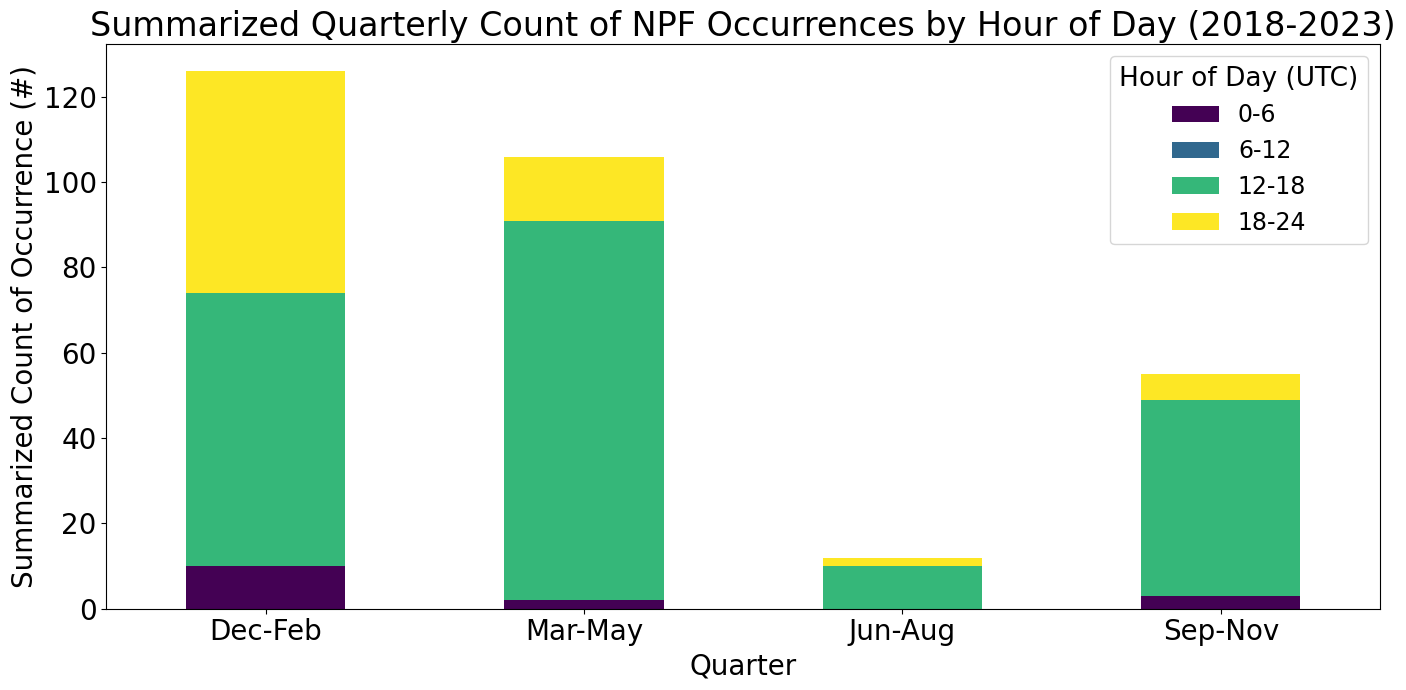

time_group   0-6  6-12  12-18  18-24
quarter                             
Dec-Feb     10.0   0.0   64.0   52.0
Mar-May      2.0   0.0   89.0   15.0
Jun-Aug      0.0   0.0   10.0    2.0
Sep-Nov      3.0   0.0   46.0    6.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the specified directory
Dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all.csv')

# Convert the 'date' column to datetime and extract year and month
Dat['date'] = pd.to_datetime(Dat['date'], format='%Y%m%d')
Dat['year'] = Dat['date'].dt.year
Dat['month'] = Dat['date'].dt.month

# Function to categorize 'start_time'
def time_group(start_time):
    if start_time < 6:
        return '0-6'
    elif start_time < 12:
        return '6-12'
    elif start_time < 18:
        return '12-18'
    else:
        return '18-24'

# Apply the function to create a new 'time_group' column
Dat['time_group'] = Dat['start_time'].apply(time_group)

# Remove rows with NaN in 'start_time'
Dat = Dat.dropna(subset=['start_time'])

# Revised function to categorize 'month' into new groups
def quarter_group(month):
    if month == 12 or month <= 2:
        return 'Dec-Feb'
    elif month <= 5:
        return 'Mar-May'
    elif month <= 8:
        return 'Jun-Aug'
    else:
        return 'Sep-Nov'

# Apply the function to create a new 'quarter' column
Dat['quarter'] = Dat['month'].apply(quarter_group)

# Define the order for 'quarter' and 'time_group'
quarter_order = ['Dec-Feb', 'Mar-May', 'Jun-Aug', 'Sep-Nov']
time_group_order = ['0-6', '6-12', '12-18', '18-24']

# Convert 'quarter' and 'time_group' to categorical types with the specified order
Dat['quarter'] = pd.Categorical(Dat['quarter'], categories=quarter_order, ordered=True)
Dat['time_group'] = pd.Categorical(Dat['time_group'], categories=time_group_order, ordered=True)

# Group by quarter and time_group, then sum up the counts across all years
grouped_data = Dat.groupby(['quarter', 'time_group']).size().reset_index(name='count')

# Pivot the grouped data for plotting
pivot_data = grouped_data.pivot_table(index='quarter', columns='time_group', values='count', fill_value=0)

# Plot the stacked bar chart
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='viridis')

# Set larger fonts for the title, x-axis label, and y-axis label
plt.title('Summarized Quarterly Count of NPF Occurrences by Hour of Day (2018-2023)', fontsize=24)
plt.xlabel('Quarter', fontsize=20)
plt.ylabel('Summarized Count of Occurrence (#)', fontsize=20)

# Set the font size for the tick labels
plt.xticks(rotation=0, fontsize=20)
plt.yticks(fontsize=20)

# Set the font size for the legend
plt.legend(title='Hour of Day (UTC)', fontsize=17, title_fontsize=19)

plt.tight_layout()

# Show the plot
plt.show()

# Print the pivot table
print(pivot_data)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
Dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all.csv')

# Convert the 'date' column to datetime and extract year and month
Dat['date'] = pd.to_datetime(Dat['date'], format='%Y%m%d')
Dat['year'] = Dat['date'].dt.year
Dat['month'] = Dat['date'].dt.month

# Function to categorize 'start_time'
def time_group(start_time):
    if start_time < 6:
        return '0-6'
    elif start_time < 12:
        return '6-12'
    elif start_time < 18:
        return '12-18'
    else:
        return '18-24'

# Apply the function to create a new 'time_group' column
Dat['time_group'] = Dat['start_time'].apply(time_group)

# Remove rows with NaN in 'start_time'
Dat = Dat.dropna(subset=['start_time'])

# Revised function to categorize 'month' into new groups
def quarter_group(month):
    if month == 12 or month <= 2:
        return 'Dec-Feb'
    elif month <= 5:
        return 'Mar-May'
    elif month <= 8:
        return 'Jun-Aug'
    else:
        return 'Sep-Nov'

# Apply the function to create a new 'quarter' column
Dat['quarter'] = Dat['month'].apply(quarter_group)

# Convert 'quarter' and 'time_group' to categorical types
Dat['quarter'] = pd.Categorical(Dat['quarter'], categories=['Dec-Feb', 'Mar-May', 'Jun-Aug', 'Sep-Nov'], ordered=True)
Dat['time_group'] = pd.Categorical(Dat['time_group'], categories=['0-6', '6-12', '12-18', '18-24'], ordered=True)

# Group by quarter and time_group, listing the dates
grouped_dates = Dat.groupby(['quarter', 'time_group'])['date'].unique().reset_index()

# Explode the 'date' column to have each date on a separate row
grouped_dates = grouped_dates.explode('date')

# Save this data to a CSV file
grouped_dates.to_csv('/content/drive/MyDrive/PNNL_Data/csv_count/Detailed_Quarterly_Dates.csv', index=False)

# Print the DataFrame
print(grouped_dates)


<ipython-input-9-6db5434b7f0f>:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_dates = Dat.groupby(['quarter', 'time_group'])['date'].unique().reset_index()


    quarter time_group       date
0   Dec-Feb        0-6 2018-12-15
0   Dec-Feb        0-6 2018-12-17
0   Dec-Feb        0-6 2018-12-20
0   Dec-Feb        0-6 2020-01-19
0   Dec-Feb        0-6 2020-12-25
..      ...        ...        ...
15  Sep-Nov      18-24 2020-11-10
15  Sep-Nov      18-24 2021-11-17
15  Sep-Nov      18-24 2023-10-31
15  Sep-Nov      18-24 2023-11-09
15  Sep-Nov      18-24 2023-11-17

[304 rows x 3 columns]


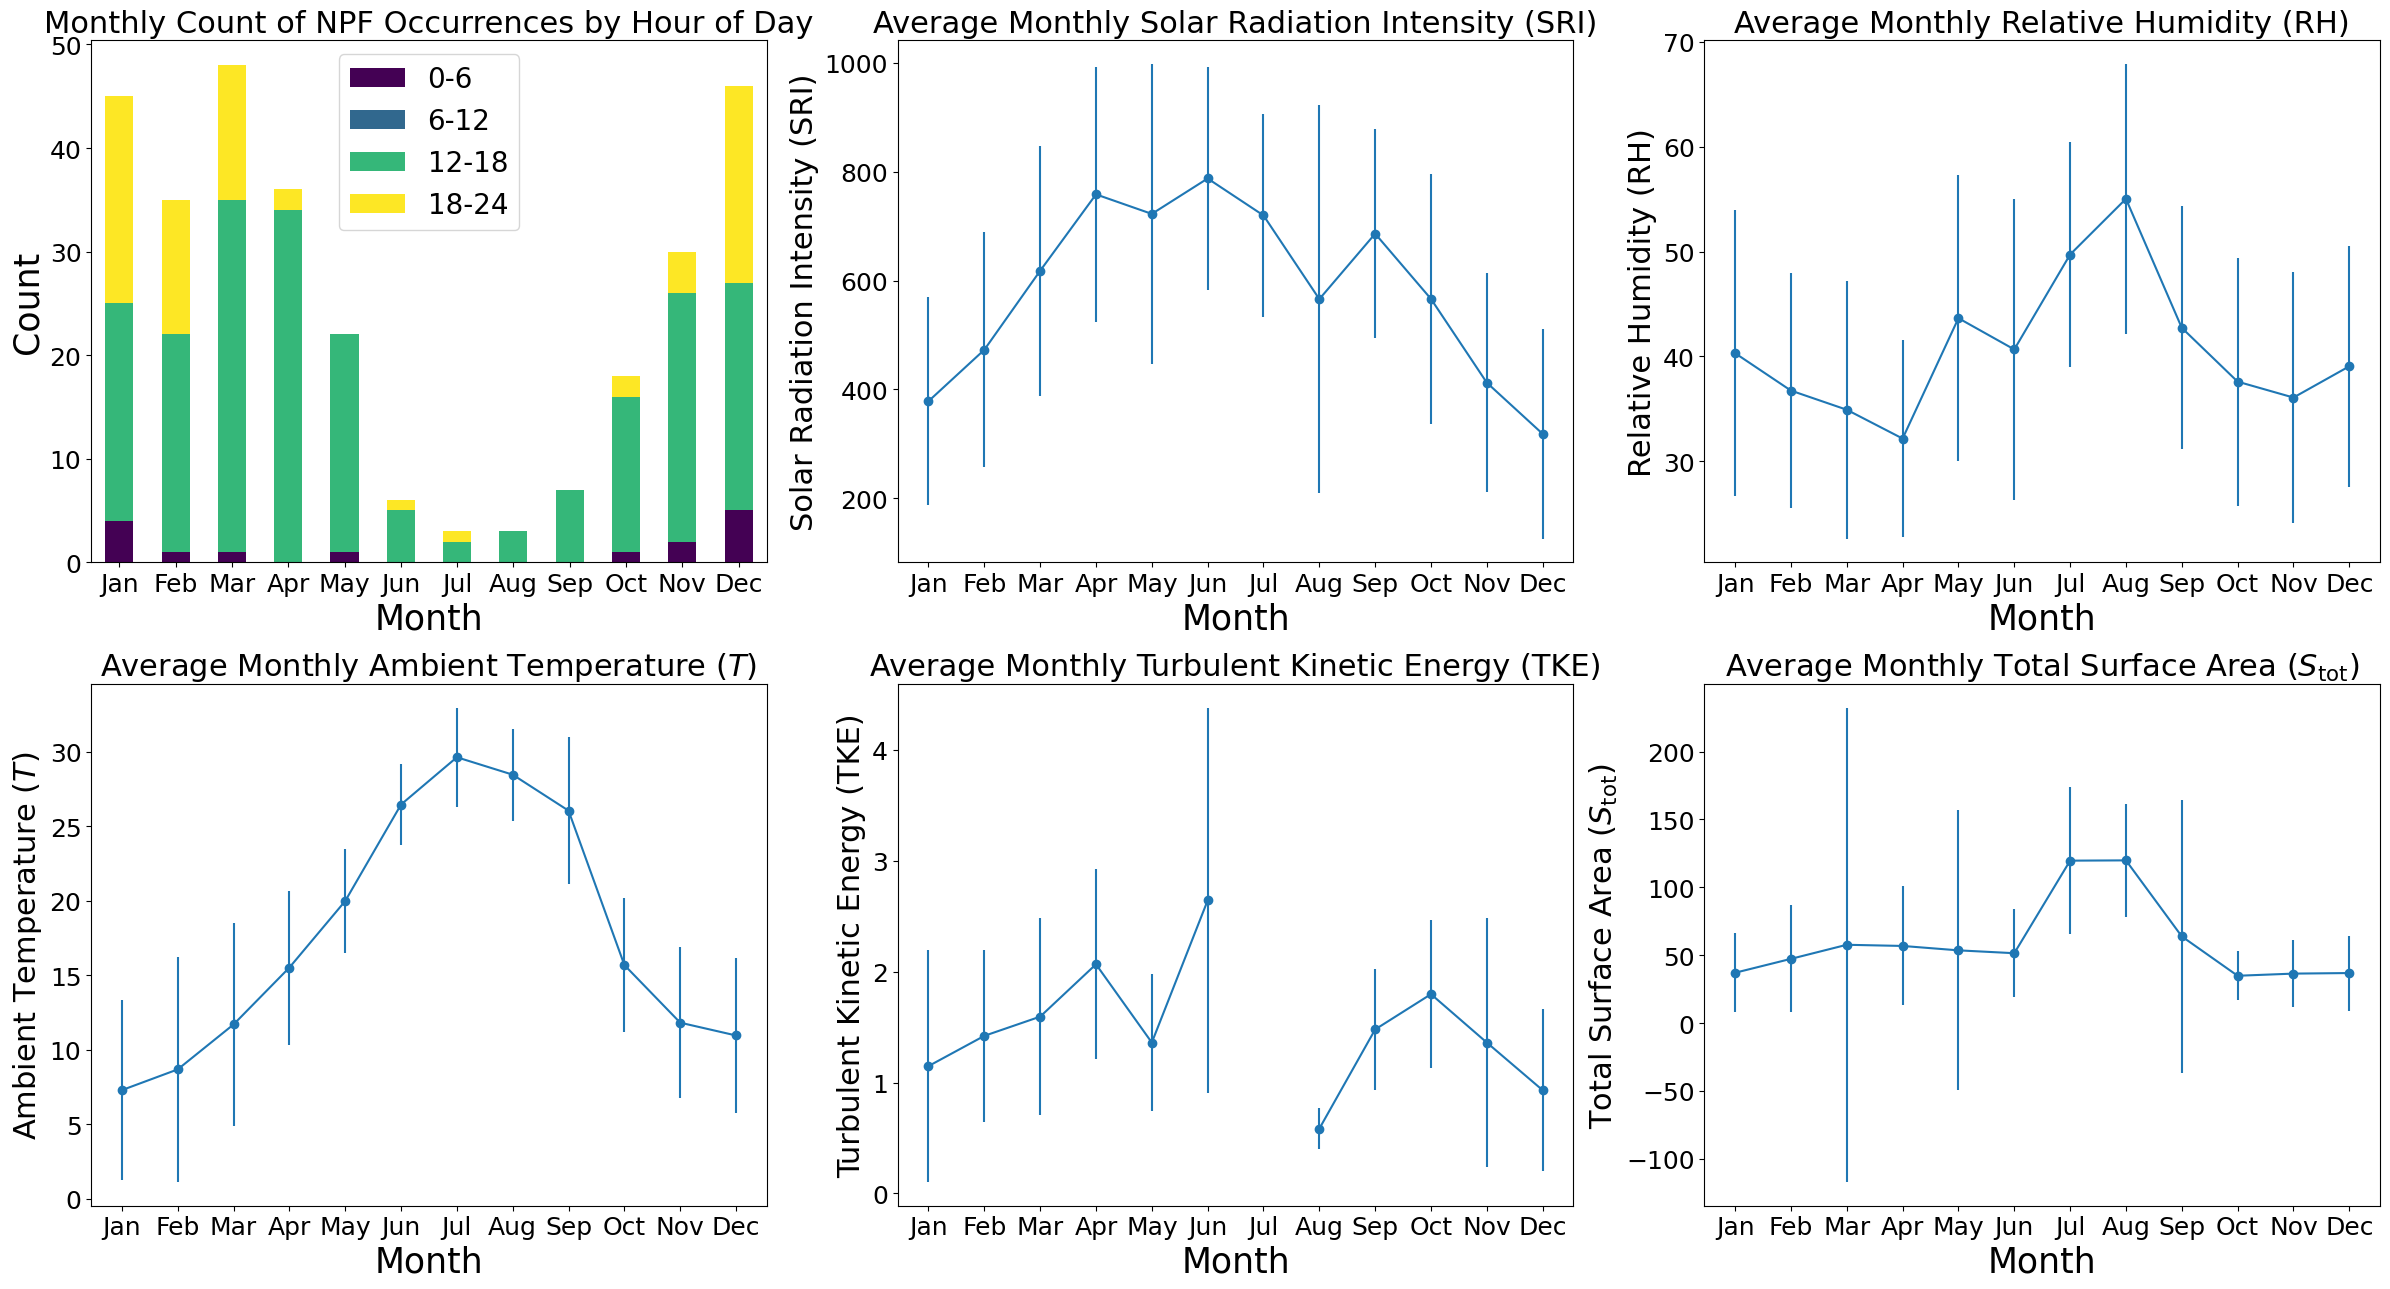

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Read the data
data_path = '/content/drive/MyDrive/Colab Notebooks/NPF/In PNNL/aligned_data_2018_2023_all_0910.csv'
Dat = pd.read_csv(data_path)

# Convert the 'date' column to datetime and extract year and month
Dat['date'] = pd.to_datetime(Dat['date'], format='%Y%m%d')
Dat['month'] = Dat['date'].dt.month

# Function to categorize 'start_time'
def time_group(start_time):
    if pd.isna(start_time):
        return 'NaN'
    elif start_time < 6:
        return '0-6'
    elif start_time < 12:
        return '6-12'
    elif start_time < 18:
        return '12-18'
    else:
        return '18-24'

# Apply the function to create a new 'time_group' column
Dat['time_group'] = Dat['start_time'].apply(time_group)

# Filter rows where flag3 equals 1
filtered_data = Dat[Dat['flag3'] == 1]

# Calculate averages and standard deviations for selected environmental variables
env_vars = ['BestEstimate_down_short_hemisp_interp', 'rh_ambient_interp', 'temperature_ambient_interp',
            'turbulent_kinetic_energy_interp', 'total_SA_conc_smps_interp']
new_labels = ['Solar Radiation Intensity (SRI)', 'Relative Humidity (RH)', 'Ambient Temperature ($T$)',
              'Turbulent Kinetic Energy (TKE)', 'Total Surface Area ($S_{\mathrm{tot}}$)']

monthly_stats = filtered_data.groupby('month')[env_vars].agg(['mean', 'std'])

# Group by month and time_group, then sum up the counts across all years for NPF occurrences
grouped_data = Dat.groupby(['month', 'time_group']).size().reset_index(name='count')
pivot_data = grouped_data.pivot_table(index='month', columns='time_group', values='count', fill_value=0)
pivot_data = pivot_data.reindex(columns=['0-6', '6-12', '12-18', '18-24'])
pivot_data.index = pivot_data.index.map(lambda x: calendar.month_abbr[x])

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(24, 13))  # Increased figure size
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot NPF occurrences by time group
pivot_data.plot(kind='bar', stacked=True, colormap='viridis', ax=axes[0])
axes[0].set_title('Monthly Count of NPF Occurrences by Hour of Day', fontsize=22)
axes[0].set_ylabel('Count', fontsize=25)
axes[0].tick_params(axis='x', labelsize=20)  # Increase x-axis label size
# Set the legend font size
axes[0].legend(fontsize=20)  # Increase the font size of the legend labels

# Plot for temperature, RH, and other interpolated values with new labels
for i, (var, label) in enumerate(zip(env_vars, new_labels)):
    axes[i + 1].errorbar(monthly_stats.index.map(lambda x: calendar.month_abbr[x]), monthly_stats[(var, 'mean')],
                         yerr=monthly_stats[(var, 'std')], label=f'Avg {label}', fmt='-o')
    axes[i + 1].set_title(f'Average Monthly {label}', fontsize=22)
    axes[i + 1].set_ylabel(label, fontsize=22)  # Adjusted font size for labels

for ax in axes[:8]:  # Adjust the number of axes used based on the number of plots
    ax.set_xlabel('Month', fontsize=25)
    ax.tick_params(axis='x', rotation=0, labelsize=18)
    ax.tick_params(axis='y', rotation=0, labelsize=18)

plt.tight_layout()  # Optimizes layout to minimize label overlap
plt.show()
